In [5]:
from datetime import datetime 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ffn
import os
import path
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6) # (w, h)
#plt.ioff()

In [6]:
#tickers = ['VCB','BID','ACB','HDB','TPB','MBB','BAB','TCB','CTG','VPB','EIB','VIB','STB','KLB','NVB','LPB','SHB']
tickers = ['VCB','BID','ACB','HDB','TPB','MBB','TCB','CTG','VPB','EIB','STB']

In [7]:
available_sticker = [fileName.split('.')[0] for fileName in os.listdir('data/') if fileName.endswith('csv')]
download_sticker = [sticker for sticker in tickers if (sticker not in available_sticker)]
download_sticker

[]

In [19]:
ticker = 'VCB'
df = pd.read_csv(f'data/{ticker}.csv')


In [8]:
#stocks = [pd.read_csv(f'data/{ticker}.csv',index_col='date',parse_dates=True)['adj_close'].rename(ticker) for ticker in tickers]
prices = (pd.concat(
    [pd.read_csv(f'data/{ticker}.csv',index_col='date',parse_dates=True)['adj_close'].rename(ticker) for ticker in tickers]
    ,axis=1,sort=True))

In [25]:
prices = prices[:'2020-10-16']
prices

,VCB,BID,ACB,HDB,TPB,MBB,TCB,CTG,VPB,EIB,STB
date,,,,,,,,,,,
2016-01-04,30.05,17.97,9.22,NaN,NaN,8.54,NaN,16.93,NaN,11.20,12.60
2016-01-05,29.56,17.88,9.08,NaN,NaN,8.48,NaN,16.74,NaN,11.20,12.30
2016-01-06,29.91,17.97,9.12,NaN,NaN,8.54,NaN,16.93,NaN,11.20,12.80
2016-01-07,29.56,17.17,8.94,NaN,NaN,8.42,NaN,16.74,NaN,11.10,12.60
2016-01-08,29.35,16.72,8.94,NaN,NaN,8.36,NaN,16.37,NaN,10.90,12.60
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,85.90,40.95,23.30,24.35,24.80,17.55,21.20,29.10,23.40,17.20,13.30
2020-10-13,86.50,41.25,23.40,24.00,24.85,17.50,21.40,30.55,23.40,17.40,13.45
2020-10-14,88.20,42.90,24.00,24.25,25.00,17.65,22.85,30.00,24.00,17.40,13.50


In [9]:
prices = prices.dropna()


In [10]:
from scipy.stats import linregress
def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return ((1 + slope) ** 252) * (rvalue ** 2)

In [11]:
momentums = prices.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = prices[ticker].rolling(90).apply(momentum, raw=False)
momentums

,VCB,BID,ACB,HDB,TPB,MBB,TCB,CTG,VPB,EIB,STB
date,,,,,,,,,,,
2018-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-12,0.004363,0.033992,1.121015,0.809190,0.500072,0.191286,0.009906,0.517242,0.036788,0.073071,0.529347
2020-10-13,0.006474,0.033441,1.140706,0.809551,0.552018,0.218387,0.013234,0.541527,0.022765,0.119219,0.535960
2020-10-14,0.006386,0.025196,1.172643,0.815957,0.622775,0.254812,0.027436,0.583166,0.009809,0.156337,0.546715


In [15]:
stocks = prices['2020-01-01':]

Index(['BID', 'HDB', 'EIB', 'VCB', 'STB', 'TCB', 'CTG'], dtype='object')

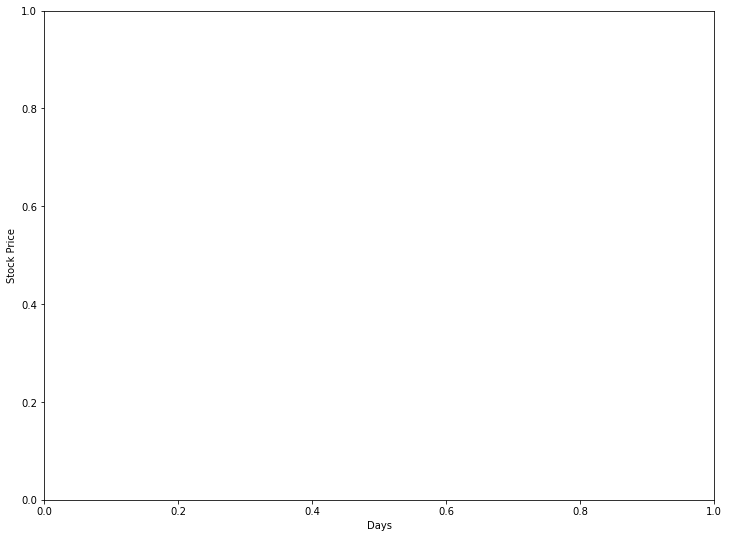

In [16]:
plt.figure(figsize=(12, 9))
plt.xlabel('Days')
plt.ylabel('Stock Price')

bests = momentums.max().sort_values(ascending=False).index[:7]
bests
#bests = ['HDB', 'EIB', 'VCB', 'STB']

ValueError: Inputs must not be empty.

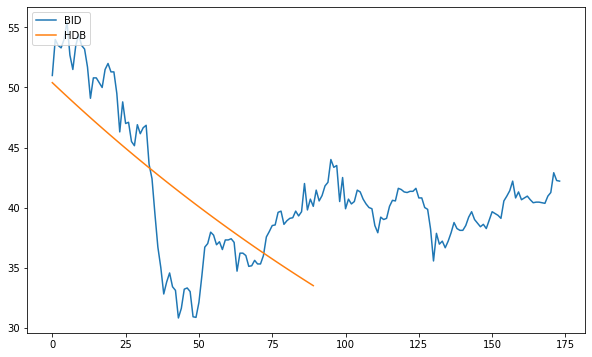

In [17]:
for best in bests:
    end = momentums[best].index.get_loc(momentums[best].idxmax())
    rets = np.log(stocks[best].iloc[end - 90 : end])
    x = np.arange(len(rets))
    slope, intercept, r_value, p_value, std_err = linregress(x, rets)
    plt.plot(np.arange(len(stocks[best][end-90:end+90])), stocks[best][end-90:end+90])
    plt.plot(x, np.e ** (intercept + slope*x))
    plt.legend(bests,loc = 'upper left')
plt.show()

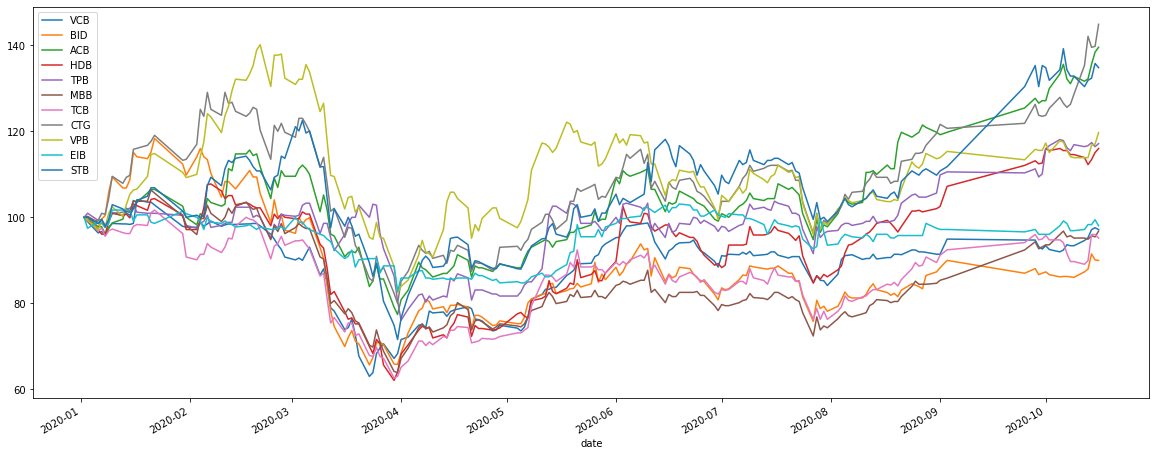

In [22]:
prices = prices['2020-01-01':].dropna()
prices.rebase().plot(figsize = (20,8))

In [24]:
#perf.set_riskfree_rate(0.05)
perf = prices.calc_stats()

In [43]:
cagr = prices.calc_max_drawdown
cagr

<bound method calc_max_drawdown of              VCB    BID    ACB    HDB    TPB    MBB    TCB    CTG    VPB  \
date                                                                       
2020-01-02  90.8  46.90  17.70  21.38  21.30  18.44  23.80  21.50  20.55   
2020-01-03  89.9  46.70  17.70  21.19  21.50  18.48  23.65  21.30  20.40   
2020-01-06  87.5  45.80  17.31  20.77  21.15  18.22  23.05  21.35  19.95   
2020-01-07  87.8  46.70  17.31  20.54  21.20  18.26  23.20  21.70  20.35   
2020-01-08  87.0  47.10  17.01  20.54  20.90  18.00  22.75  21.65  20.10   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
2020-10-12  85.9  40.95  23.30  24.35  24.80  17.55  21.20  29.10  23.40   
2020-10-13  86.5  41.25  23.40  24.00  24.85  17.50  21.40  30.55  23.40   
2020-10-14  88.2  42.90  24.00  24.25  25.00  17.65  22.85  30.00  24.00   
2020-10-15  88.6  42.25  24.50  24.60  24.80  17.60  22.85  30.05  24.05   
2020-10-16  88.2  42.20  24.70  24.80  24.95  17.85  